# Grovers Qiskit Builtin

In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.4 MB/s eta 0:00:00


In [16]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.3 MB/s eta 0:00:00


In [2]:
import qiskit
print(qiskit.version.get_version_info())

1.2.0


In [3]:
pip install 'qiskit[visualization]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=99b1a0b5e506bd40e68926a0b8ec7ee75dd100e4fe2142e1b302730ae6ea6460
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [4]:
pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.7/342.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [5]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

In [6]:
# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [7]:
!pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 16.9 MB/s eta 0:00:00


In [8]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", token="3301b61bae43b1c35bc5fe6d01d0b739f6ea97df558c50e2f1d3d2c7a31df7869953f3841fe2bda2d434b7d49466cc4d653f5b623ed08a9fa3f2ce831fe5a494")

backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_brisbane'

In [9]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

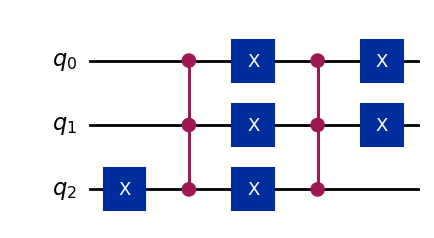

In [10]:
marked_states = ["011", "100"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

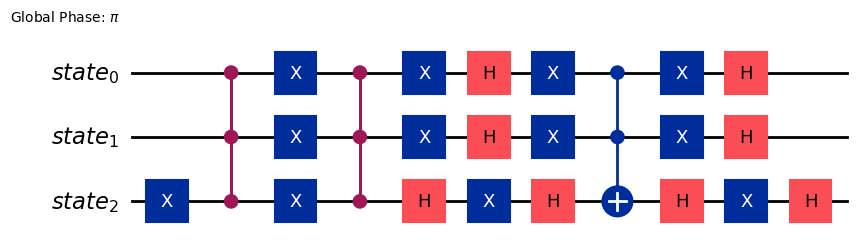

In [11]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [12]:
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

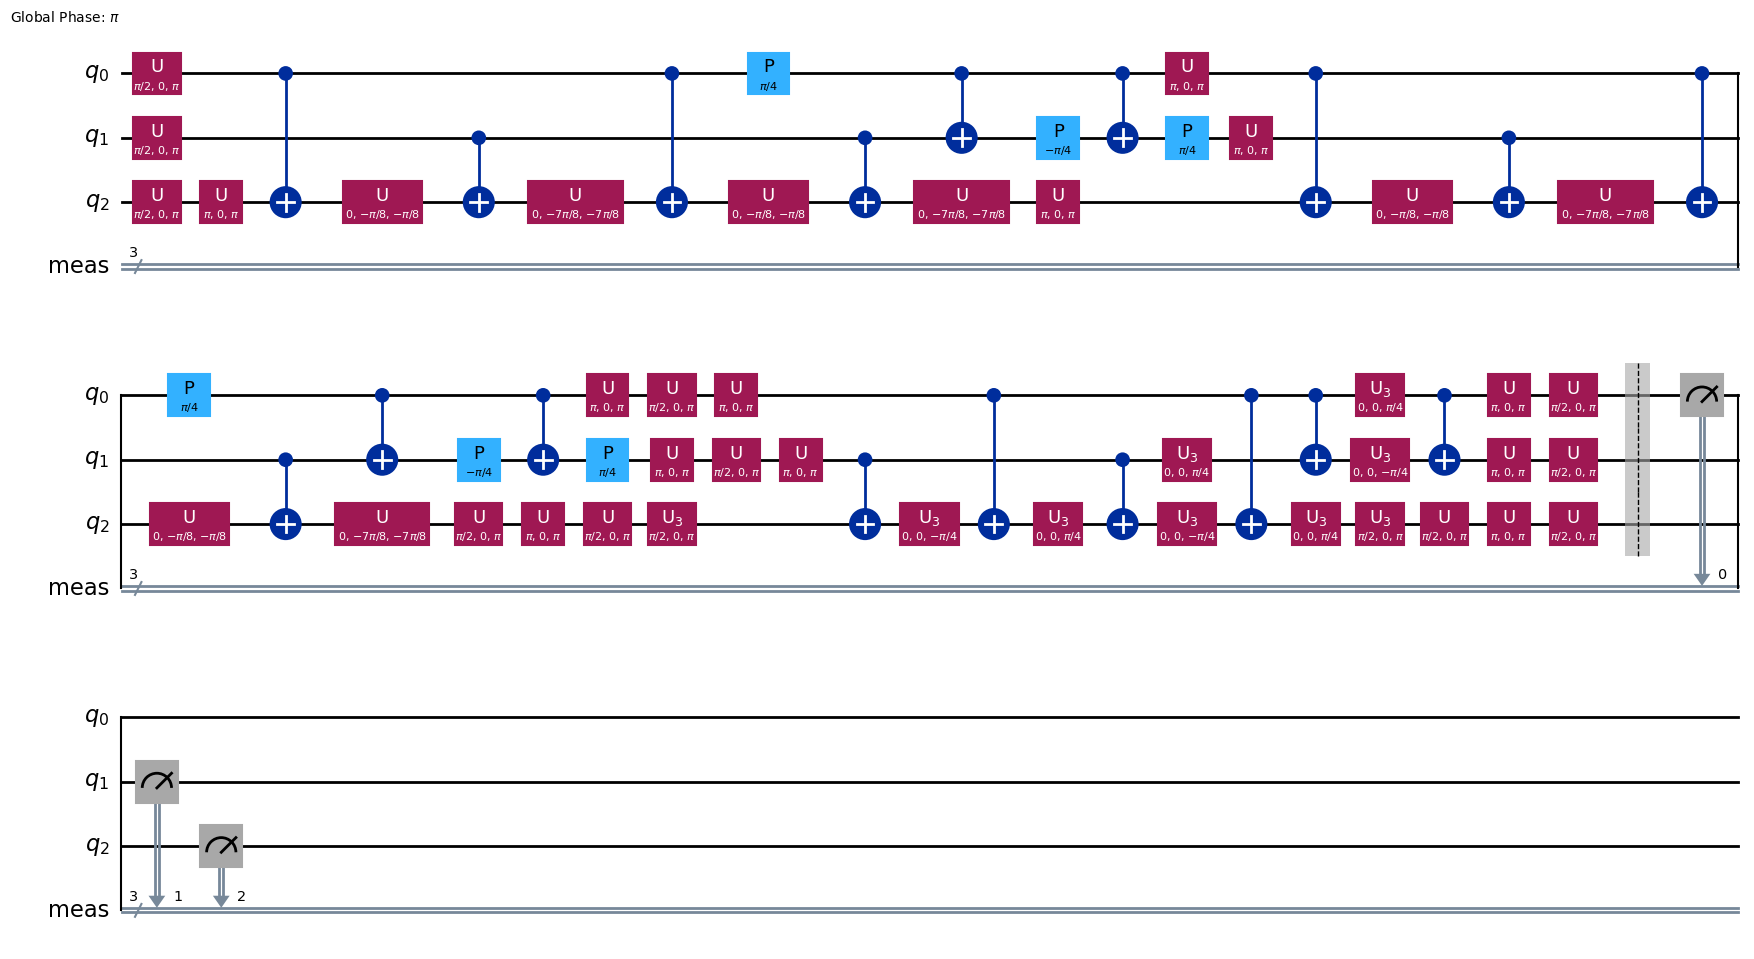

In [13]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.decompose().decompose().decompose().decompose().decompose().draw(output="mpl", style="iqp")

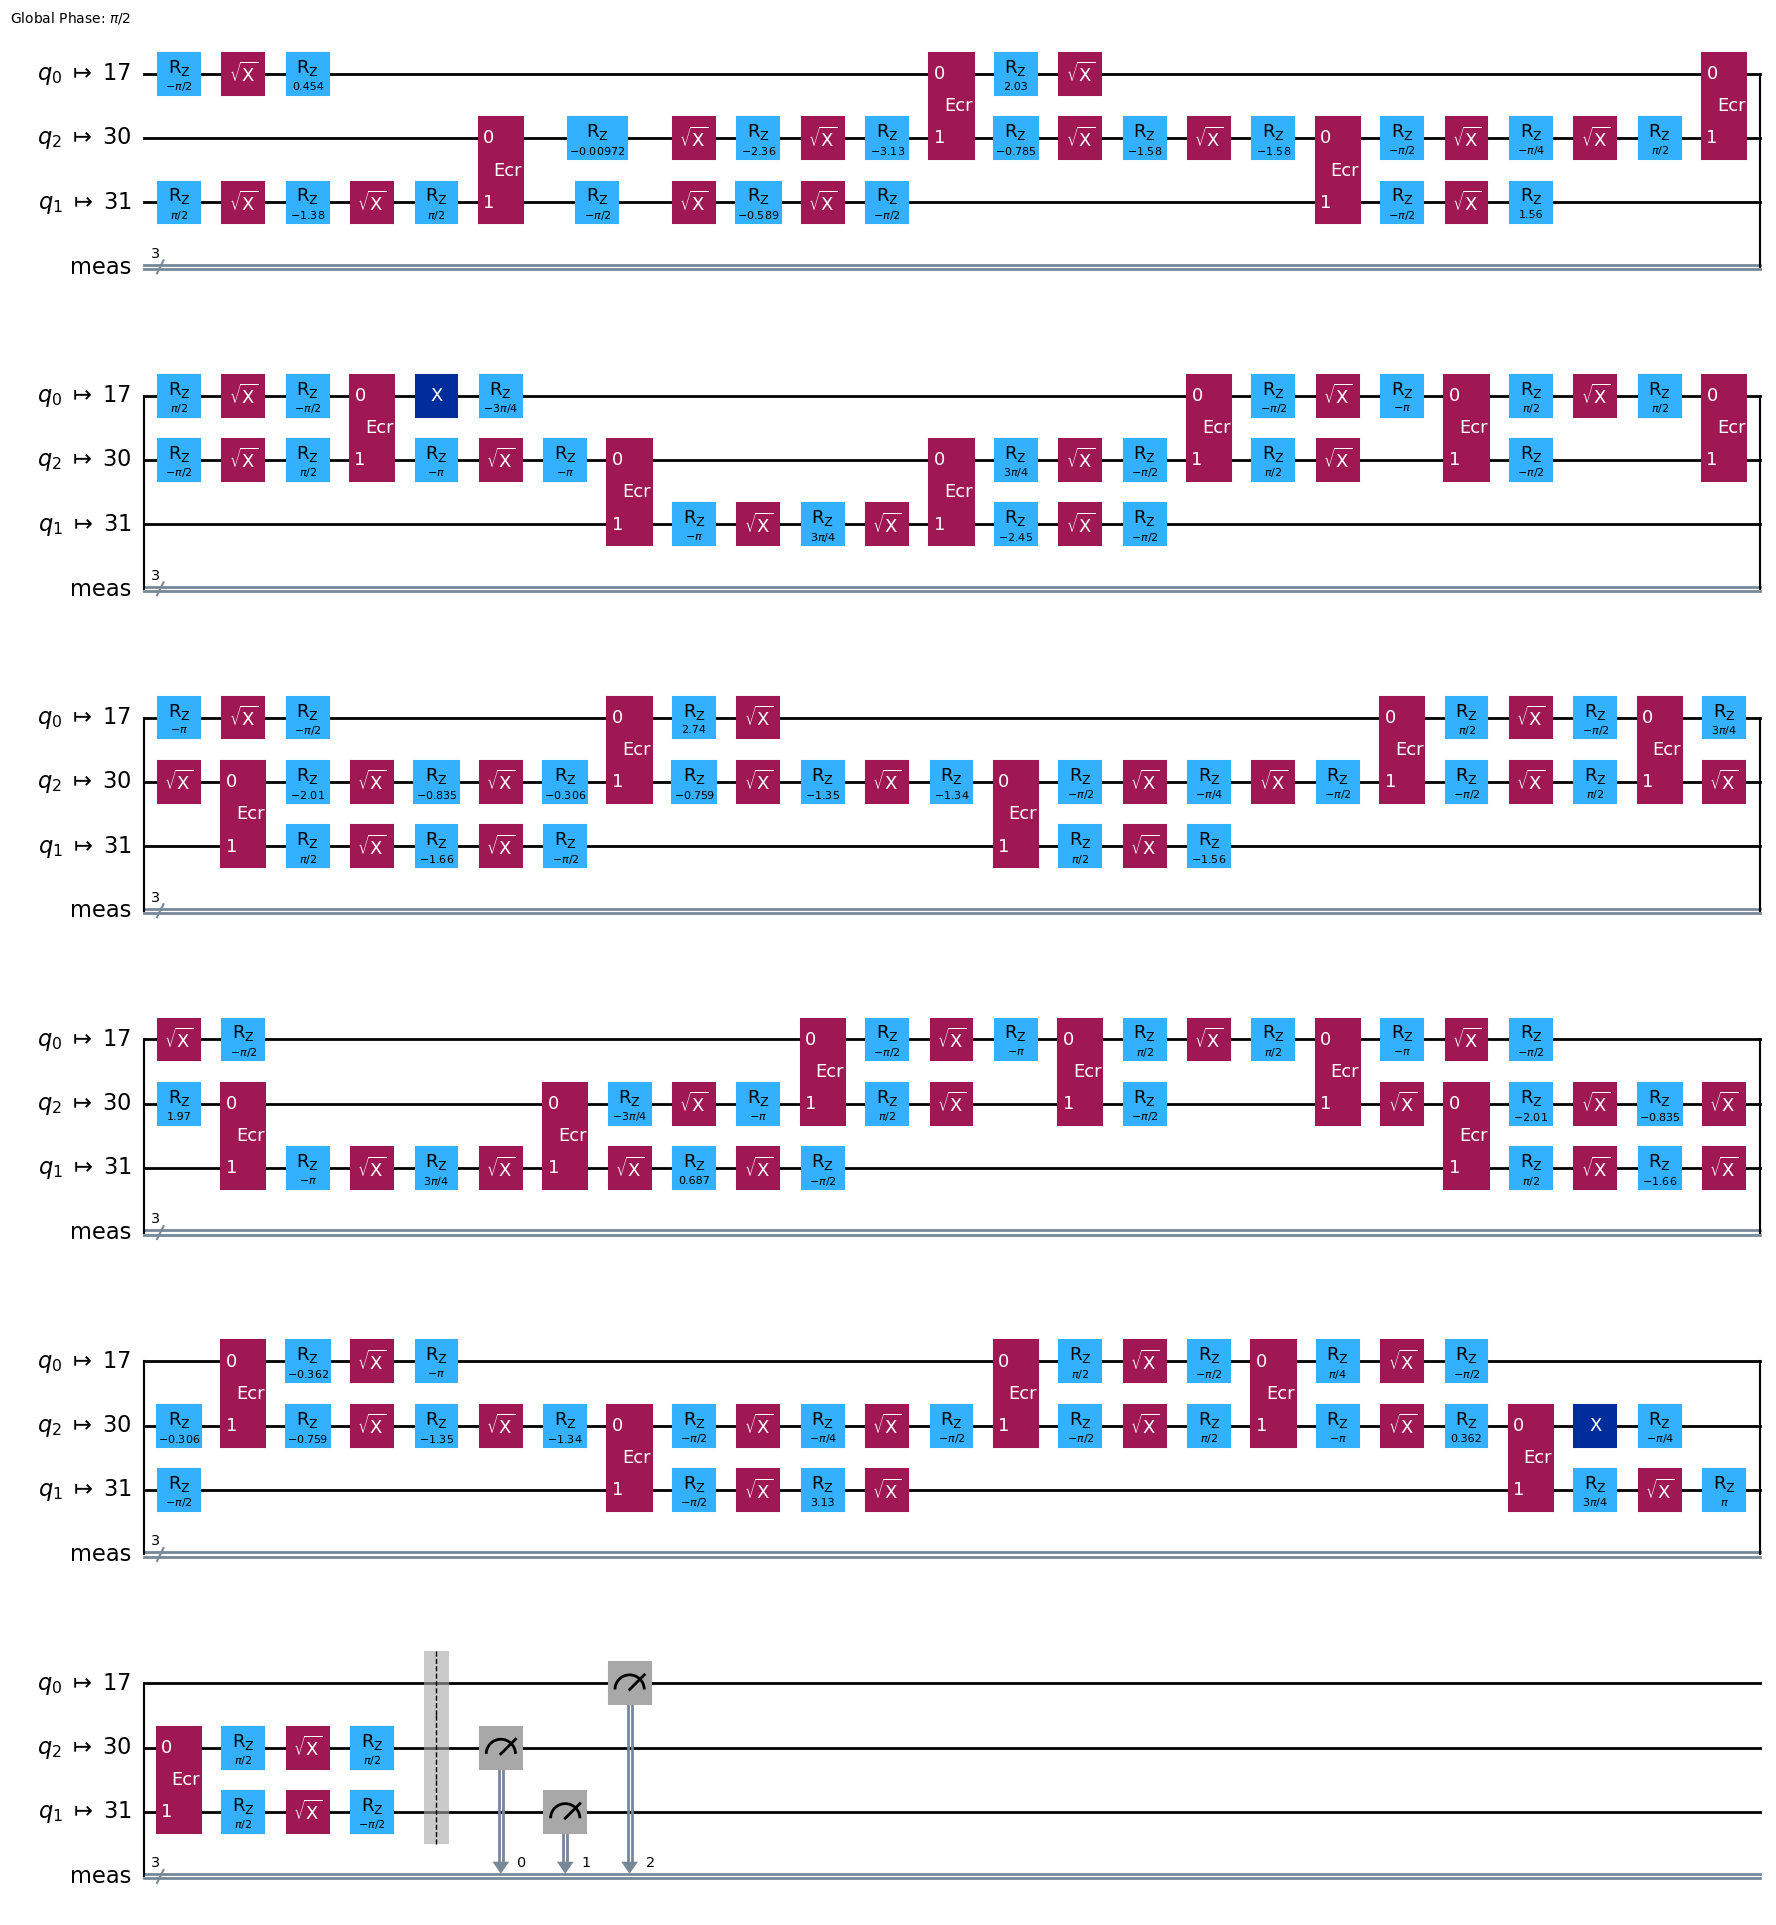

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [ ]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(backend=backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

<ipython-input-21-a975e0cca468>:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


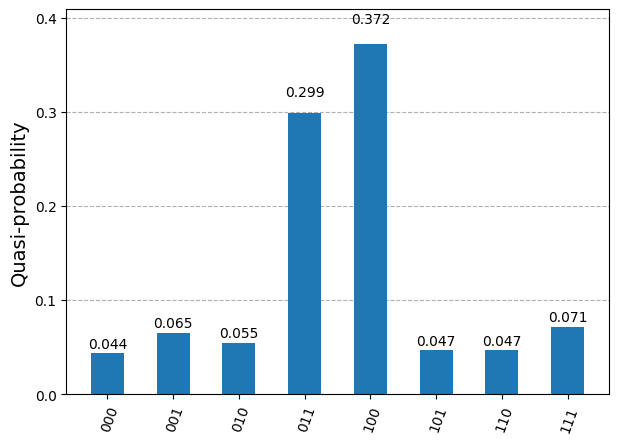

In [ ]:
plot_distribution(dist)

In [ ]:
# Estimation on Azure portal

# Grovers QSharp Builtin

In [15]:
# Installing qsharp
!pip install qsharp
!pip install qsharp_widgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 30.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [1]:
# importing necessary modules for qsharp
import qsharp
from qsharp.utils import dump_operation
from qsharp_widgets import Circuit
from qsharp_widgets import SpaceChart, EstimateDetails

In [7]:
%%qsharp

open Microsoft.Quantum.Convert;
open Microsoft.Quantum.Math;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Diagnostics;

operation ReflectAboutUniform(inputQubits : Qubit[]) : Unit {

    within {
        // Transform the uniform superposition to all-zero.
        Adjoint PrepareUniform(inputQubits);
        // Transform the all-zero state to all-ones
        for q in inputQubits {
                X(q);
          }
            }
    apply {
        // Now that we've transformed the uniform superposition to the
        // all-ones state, reflect about the all-ones state, then let the
        // within/apply block transform us back.
        ReflectAboutAllOnes(inputQubits);
    }
}



operation ReflectAboutAllOnes(inputQubits : Qubit[]) : Unit {
        Controlled Z(Most(inputQubits), Tail(inputQubits));
    }

operation PrepareUniform(inputQubits : Qubit[]) : Unit is Adj + Ctl {
      for q in inputQubits {
            H(q);
        }
    }

operation ReflectAboutMarked(inputQubits : Qubit[]) : Unit {
    Message("Reflecting about marked state...");
    use outputQubit = Qubit();
    within {
            // We initialize the outputQubit to (|0⟩ - |1⟩) / √2, so that
            // toggling it results in a (-1) phase.
            X(outputQubit);
            H(outputQubit);
            // Flip the outputQubit for marked states.
            // Here, we get the state with alternating 0s and 1s by using the X
            // operation on every other qubit.
            for q in inputQubits[...2...] {
                X(q);
            }
        } apply {
            Controlled X(inputQubits, outputQubit);
        }
    }

function CalculateOptimalIterations(nQubits : Int) : Int {
        if nQubits > 63 {
            fail "This sample supports at most 63 qubits.";
        }
        let nItems = 1 <<< nQubits; // 2^nQubits
        let angle = ArcSin(1. / Sqrt(IntAsDouble(nItems)));
        let iterations = Round(0.25 * PI() / angle - 0.5);
        return iterations;
    }

operation GroverSearch(
        nQubits : Int,
        iterations : Int,
        phaseOracle : Qubit[] => Unit) : Result[] {

        use qubits = Qubit[nQubits];

        PrepareUniform(qubits);

        for _ in 1..iterations {
            phaseOracle(qubits);
            ReflectAboutUniform(qubits);
        }

        // Measure and return the answer.
        return MResetEachZ(qubits);
    }

operation Main() : Result[] {
    let nQubits = 2;
    let iterations = CalculateOptimalIterations(nQubits);
    Message($"Number of iterations: {iterations}");

    // Use Grover's algorithm to find a particular marked state.
    let results = GroverSearch(nQubits, iterations, ReflectAboutMarked);
    return results;
    }

In [8]:
qsharp.eval("Main()")

Number of iterations: 1
Reflecting about marked state...


[Zero, One]

In [11]:
Circuit(qsharp.circuit("Main()"))

Circuit(circuit_json='{"operations":[{"gate":"H","targets":[{"qId":0,"type":0}]},{"gate":"H","targets":[{"qId"…

In [10]:
qsharp.estimate("Main()")

Runtime,36 microsecs,"Total runtime This is a runtime estimate for the execution time of the algorithm. In general, the execution time corresponds to the duration of one logical cycle (2,800 nanosecs) multiplied by the 5 logical cycles to run the algorithm. If however the duration of a single T factory (here: 36,400 nanosecs) is larger than the algorithm runtime, we extend the number of logical cycles artificially in order to exceed the runtime of a single T factory."
rQOPS,4.29M,"Reliable quantum operations per second The value is computed as the number of logical qubits after layout (12) (with a logical error rate of 8.33e-6) multiplied by the clock frequency (357,142.86), which is the number of logical cycles per second."
Physical qubits,16.86k,"Number of physical qubits This value represents the total number of physical qubits, which is the sum of 1,176 physical qubits to implement the algorithm logic, and 15,680 physical qubits to execute the T factories that are responsible to produce the T states that are consumed by the algorithm."
Logical algorithmic qubits,12,"Number of logical qubits for the algorithm after layout Laying out the logical qubits in the presence of nearest-neighbor constraints requires additional logical qubits. In particular, to layout the $Q_{\rm alg} = 3$ logical qubits in the input algorithm, we require in total $2 \cdot Q_{\rm alg} + \lceil \sqrt{8 \cdot Q_{\rm alg}}\rceil + 1 = 12$ logical qubits."
Algorithmic depth,5,"Number of logical cycles for the algorithm To execute the algorithm using _Parallel Synthesis Sequential Pauli Computation_ (PSSPC), operations are scheduled in terms of multi-qubit Pauli measurements, for which assume an execution time of one logical cycle. Based on the input algorithm, we require one multi-qubit measurement for the 2 single-qubit measurements, the 0 arbitrary single-qubit rotations, and the 0 T gates, three multi-qubit measurements for each of the 1 CCZ and 0 CCiX gates in the input program, as well as No rotations in algorithm multi-qubit measurements for each of the 0 non-Clifford layers in which there is at least one single-qubit rotation with an arbitrary angle rotation."
Logical depth,13,"Number of logical cycles performed This number is usually equal to the logical depth of the algorithm, which is 5. However, in the case in which a single T factory is slower than the execution time of the algorithm, we adjust the logical cycle depth to exceed the T factory's execution time."
Clock frequency,357.14k,Number of logical cycles per second This is the number of logical cycles that can be performed within one second. The logical cycle time is 3 microsecs.
Number of T states,4,"Number of T states consumed by the algorithm To execute the algorithm, we require one T state for each of the 0 T gates, four T states for each of the 1 CCZ and 0 CCiX gates, as well as No rotations in algorithm for each of the 0 single-qubit rotation gates with arbitrary angle rotation."
Number of T factories,4,"Number of T factories capable of producing the demanded 4 T states during the algorithm's runtime The total number of T factories 4 that are executed in parallel is computed as $\left\lceil\dfrac{\text{T states}\cdot\text{T factory duration}}{\text{T states per T factory}\cdot\text{algorithm runtime}}\right\rceil = \left\lceil\dfrac{4 \cdot 36,400\;\text{ns}}{1 \cdot 36,400\;\text{ns}}\right\rceil$"
Number of T factory invocations,1,"Number of times all T factories are invoked In order to prepare the 4 T states, the 4 copies of the T factory are repeatedly invoked 1 times."
Physical algorithmic qubits,1.18k,"Number of physical qubits for the algorithm after layout The 1,176 are the product of the 12 logical qubits after layout and the 98 physical qubits that encode a single logical qubit."


# Grovers Algorithm Example in QSharp and Qiskit

## Qiskit

11 is observed 10000 times


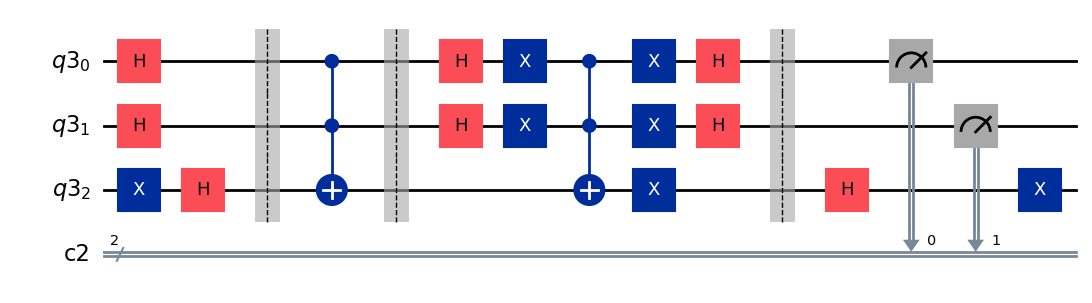

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import UnitarySimulator, AerSimulator

def inversion(circuit,quantum_reg):

    #step 1
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])

    #step 2
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])

    #step 3
    circuit.ccx(quantum_reg[1],quantum_reg[0],quantum_reg[2])

    #step 4
    circuit.x(quantum_reg[1])
    circuit.x(quantum_reg[0])

    #step 5
    circuit.x(quantum_reg[2])

    #step 6
    circuit.h(quantum_reg[1])
    circuit.h(quantum_reg[0])


def Uf(circuit,qreg):
	circuit.ccx(qreg[0],qreg[1],qreg[2])

qreg = QuantumRegister(3)
creg = ClassicalRegister(2)

mycircuit = QuantumCircuit(qreg,creg)

#Grover


#initial step - equal superposition
for i in range(2):
    mycircuit.h(qreg[i])

#set ancilla
mycircuit.x(qreg[2])
mycircuit.h(qreg[2])

mycircuit.barrier()

#change the number of iterations
iterations=1

#Grover's iterations.
for i in range(iterations):
    #query
    Uf(mycircuit,qreg)

    mycircuit.barrier()
    #inversion
    inversion(mycircuit,qreg)
    mycircuit.barrier()


#set ancilla back
mycircuit.h(qreg[2])
mycircuit.x(qreg[2])

mycircuit.measure(qreg[0],creg[0])
mycircuit.measure(qreg[1],creg[1])

job = AerSimulator().run(mycircuit,shots=10000)
counts = job.result().get_counts(mycircuit)

# print the outcome
for outcome in counts:
    print(outcome,"is observed",counts[outcome],"times")

mycircuit.draw(output='mpl')


In [ ]:
#Estimation on azure portal

## QSharp

In [20]:
%%qsharp

open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;


operation Inversion(qubits : Qubit[]) : Unit {
        // Step 1
        H(qubits[1]);
        H(qubits[0]);

        // Step 2
        X(qubits[1]);
        X(qubits[0]);

        // Step 3
        CCNOT(qubits[1], qubits[0], qubits[2]);

        // Step 4
        X(qubits[1]);
        X(qubits[0]);

        // Step 5
        X(qubits[2]);

        // Step 6
        H(qubits[1]);
        H(qubits[0]);
    }

operation Uf(qubits : Qubit[]) : Unit {
        CCNOT(qubits[0], qubits[1], qubits[2]);
    }


operation Main() : Result[] {
        use qubits = Qubit[3];

        H(qubits[0]);
        H(qubits[1]);

        // Set ancilla qubit to |->
        X(qubits[2]);
        H(qubits[2]);

        let iterations=1;

        for _ in 1..iterations {
            Uf(qubits);
            Inversion(qubits);
        }

        // Set ancilla qubit back to |0>
        H(qubits[2]);
        X(qubits[2]);

        return MResetEachZ(qubits);
}

In [21]:
qsharp.eval("Main()")

[One, One, Zero]

In [22]:
Circuit(qsharp.circuit("Main()"))

Circuit(circuit_json='{"operations":[{"gate":"H","targets":[{"qId":0,"type":0}]},{"gate":"H","targets":[{"qId"…

In [23]:
qsharp.estimate("Main()")

Runtime,36 microsecs,"Total runtime This is a runtime estimate for the execution time of the algorithm. In general, the execution time corresponds to the duration of one logical cycle (2,800 nanosecs) multiplied by the 9 logical cycles to run the algorithm. If however the duration of a single T factory (here: 36,400 nanosecs) is larger than the algorithm runtime, we extend the number of logical cycles artificially in order to exceed the runtime of a single T factory."
rQOPS,4.29M,"Reliable quantum operations per second The value is computed as the number of logical qubits after layout (12) (with a logical error rate of 4.63e-6) multiplied by the clock frequency (357,142.86), which is the number of logical cycles per second."
Physical qubits,32.54k,"Number of physical qubits This value represents the total number of physical qubits, which is the sum of 1,176 physical qubits to implement the algorithm logic, and 31,360 physical qubits to execute the T factories that are responsible to produce the T states that are consumed by the algorithm."
Logical algorithmic qubits,12,"Number of logical qubits for the algorithm after layout Laying out the logical qubits in the presence of nearest-neighbor constraints requires additional logical qubits. In particular, to layout the $Q_{\rm alg} = 3$ logical qubits in the input algorithm, we require in total $2 \cdot Q_{\rm alg} + \lceil \sqrt{8 \cdot Q_{\rm alg}}\rceil + 1 = 12$ logical qubits."
Algorithmic depth,9,"Number of logical cycles for the algorithm To execute the algorithm using _Parallel Synthesis Sequential Pauli Computation_ (PSSPC), operations are scheduled in terms of multi-qubit Pauli measurements, for which assume an execution time of one logical cycle. Based on the input algorithm, we require one multi-qubit measurement for the 3 single-qubit measurements, the 0 arbitrary single-qubit rotations, and the 0 T gates, three multi-qubit measurements for each of the 2 CCZ and 0 CCiX gates in the input program, as well as No rotations in algorithm multi-qubit measurements for each of the 0 non-Clifford layers in which there is at least one single-qubit rotation with an arbitrary angle rotation."
Logical depth,13,"Number of logical cycles performed This number is usually equal to the logical depth of the algorithm, which is 9. However, in the case in which a single T factory is slower than the execution time of the algorithm, we adjust the logical cycle depth to exceed the T factory's execution time."
Clock frequency,357.14k,Number of logical cycles per second This is the number of logical cycles that can be performed within one second. The logical cycle time is 3 microsecs.
Number of T states,8,"Number of T states consumed by the algorithm To execute the algorithm, we require one T state for each of the 0 T gates, four T states for each of the 2 CCZ and 0 CCiX gates, as well as No rotations in algorithm for each of the 0 single-qubit rotation gates with arbitrary angle rotation."
Number of T factories,8,"Number of T factories capable of producing the demanded 8 T states during the algorithm's runtime The total number of T factories 8 that are executed in parallel is computed as $\left\lceil\dfrac{\text{T states}\cdot\text{T factory duration}}{\text{T states per T factory}\cdot\text{algorithm runtime}}\right\rceil = \left\lceil\dfrac{8 \cdot 36,400\;\text{ns}}{1 \cdot 36,400\;\text{ns}}\right\rceil$"
Number of T factory invocations,1,"Number of times all T factories are invoked In order to prepare the 8 T states, the 8 copies of the T factory are repeatedly invoked 1 times."
Physical algorithmic qubits,1.18k,"Number of physical qubits for the algorithm after layout The 1,176 are the product of the 12 logical qubits after layout and the 98 physical qubits that encode a single logical qubit."
